# Import Libraries

In [2]:
# Import required libraries for data analysis, visualization, and clustering
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the Mall Customers dataset
df = pd.read_csv('Mall_Customers.csv')

# Initial Data Exploration

In [4]:
# Display first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Summary statistics of numerical features
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Dataset shape (rows, columns)
df.shape

(200, 5)

# Data Visualization (EDA)

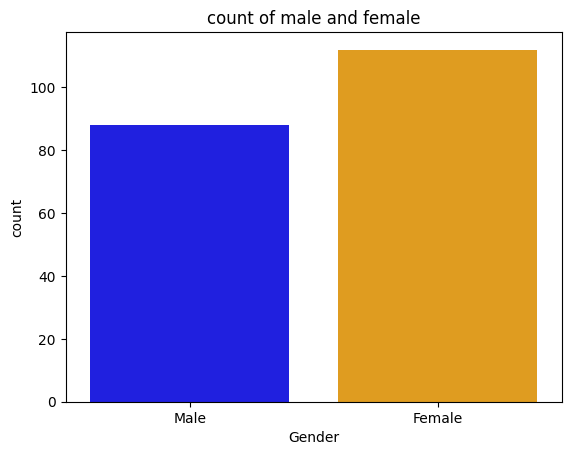

In [8]:
# Count plot to show distribution of male and female customers
sns.countplot(x = 'Gender', data = df, palette = {'Male':'blue','Female':'orange'})
plt.title('count of male and female')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

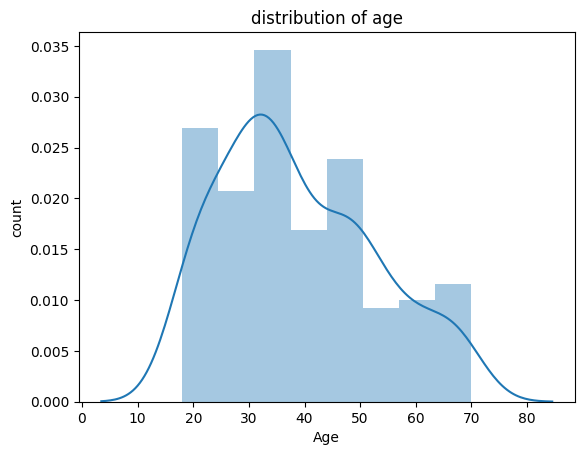

In [9]:
# Distribution of customer age
sns.distplot(df['Age'])
plt.title('distribution of age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [10]:
# Rename columns for easier usage
df = df.rename(columns = {'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'})
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


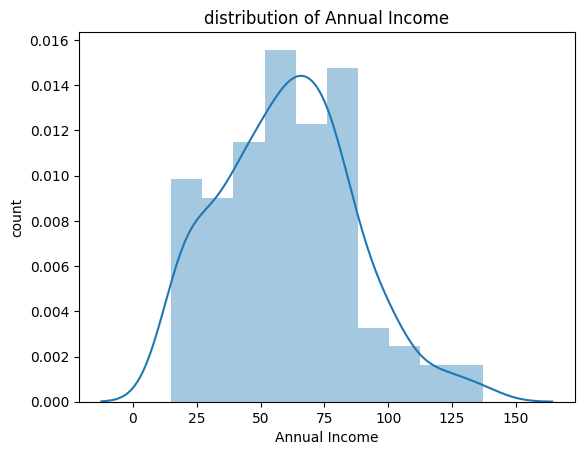

In [11]:
# Distribution of Annual Income
sns.distplot(df['Annual Income'])
plt.title('distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('count')
plt.show()

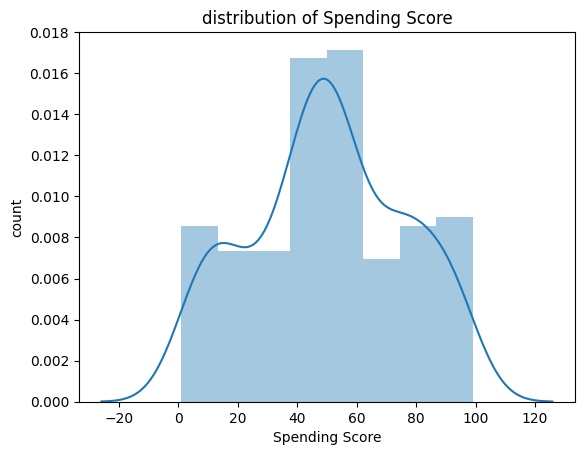

In [12]:
# Distribution of Spending Score
sns.distplot(df['Spending Score'])
plt.title('distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('count')
plt.show()

# Correlation Analysis

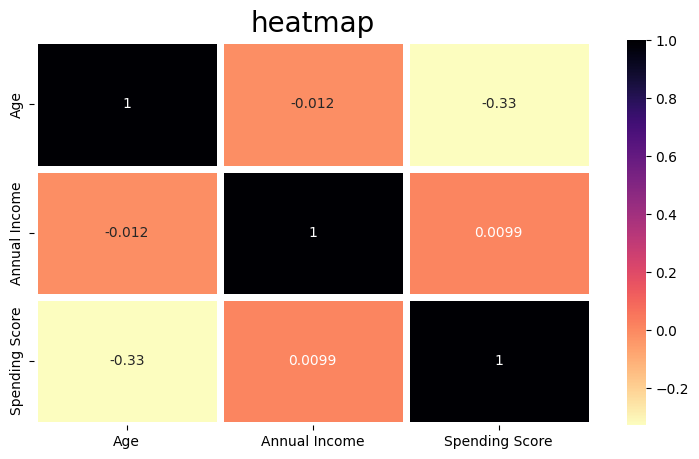

In [13]:
# Heatmap to show correlation between numerical features
plt.rcParams['figure.figsize'] =(9,5)
sns.heatmap(df[['Age','Annual Income','Spending Score']].corr(),cmap = 'magma_r',annot =True,linewidth = 5)
plt.title('heatmap',fontsize = 20)
plt.show()

# Gender-based Analysis

Text(30.631172839506164, 0.5, 'spending score (1-100)')

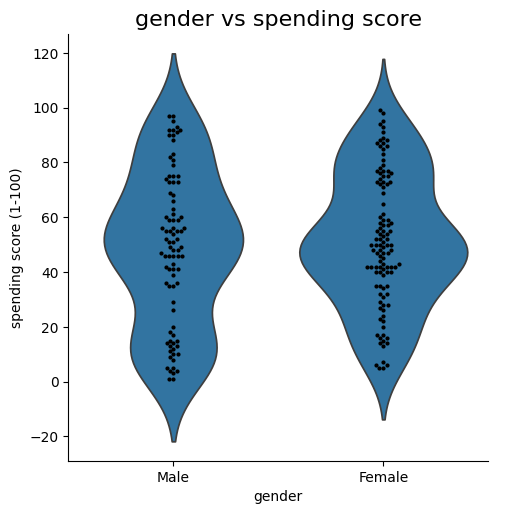

In [14]:
# Spending score based on gender
# Violin plot shows distribution and swarm plot shows individual data points
plt.rcParams['figure.figsize'] =(16,7)
g = sns.catplot(x = 'Gender',y = 'Spending Score',kind = "violin",inner = None ,data =df)
g
sns.swarmplot(x = 'Gender',y = 'Spending Score',color = "k",size = 3,data =df,ax = g.ax)
plt.title("gender vs spending score",fontsize = 16)
plt.xlabel('gender')
plt.ylabel('spending score (1-100)')

Text(30.570061728395068, 0.5, 'Annual Income (k$)')

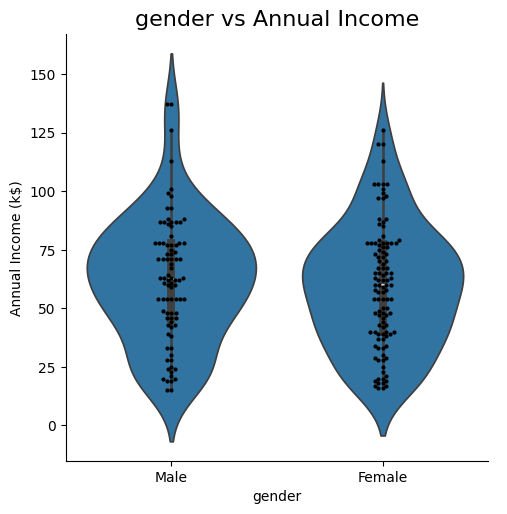

In [15]:
# Annual Income based on gender
plt.rcParams['figure.figsize'] =(16,7)
g = sns.catplot(x = 'Gender',y = 'Annual Income',kind = "violin",data =df)
g
sns.swarmplot(x = 'Gender',y = 'Annual Income',color = "k",size = 3,data =df,ax = g.ax)
plt.title("gender vs Annual Income",fontsize = 16)
plt.xlabel('gender')
plt.ylabel('Annual Income (k$)')

Text(0.5, 1.0, 'gender vs Age')

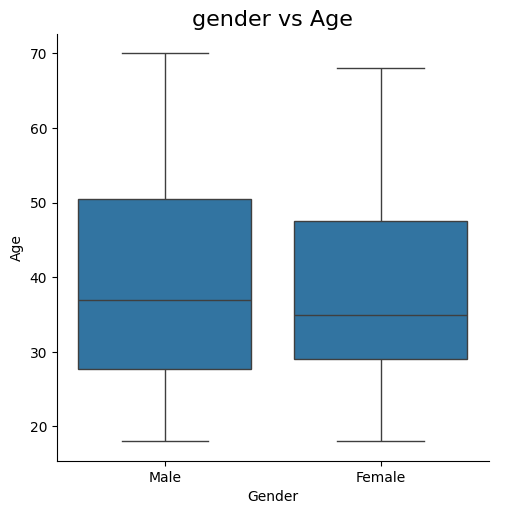

In [16]:
sns.catplot(x = 'Gender',y = 'Age',kind = 'box',data=df)
plt.title("gender vs Age",fontsize = 16)

# Feature Selection for Clustering

In [17]:
#  Selecting Annual Income and Spending Score for 2D clustering
df1 =df[['Annual Income','Spending Score']]
df1.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Elbow Method

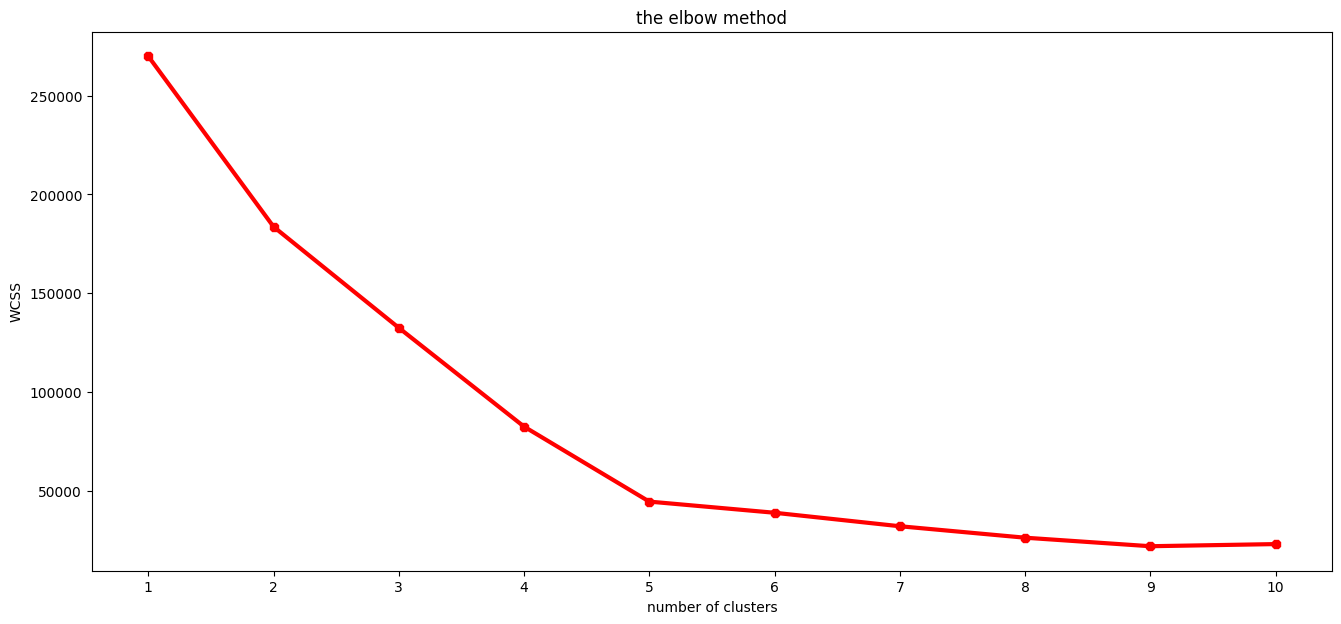

In [18]:
# Using Elbow Method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    k = KMeans(n_clusters = i)
    k . fit(df1)
    wcss.append(k.inertia_)
plt.plot(range(1,11),wcss,linewidth = 3,color = 'red',marker = '8' )
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

# K-Means Clustering (2 Features)

In [20]:
# Apply K-Means clustering with 5 clusters
k = KMeans(n_clusters = 5)
k.fit(df1)
y = k.predict(df1)


# Assign cluster labels
df1['Label']=y
df1.head()

,Annual Income,Spending Score,Label
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3


In [ ]:
# 2D Cluster Visualization

Text(0.5, 1.0, 'segmentation of customers based on 2 features')

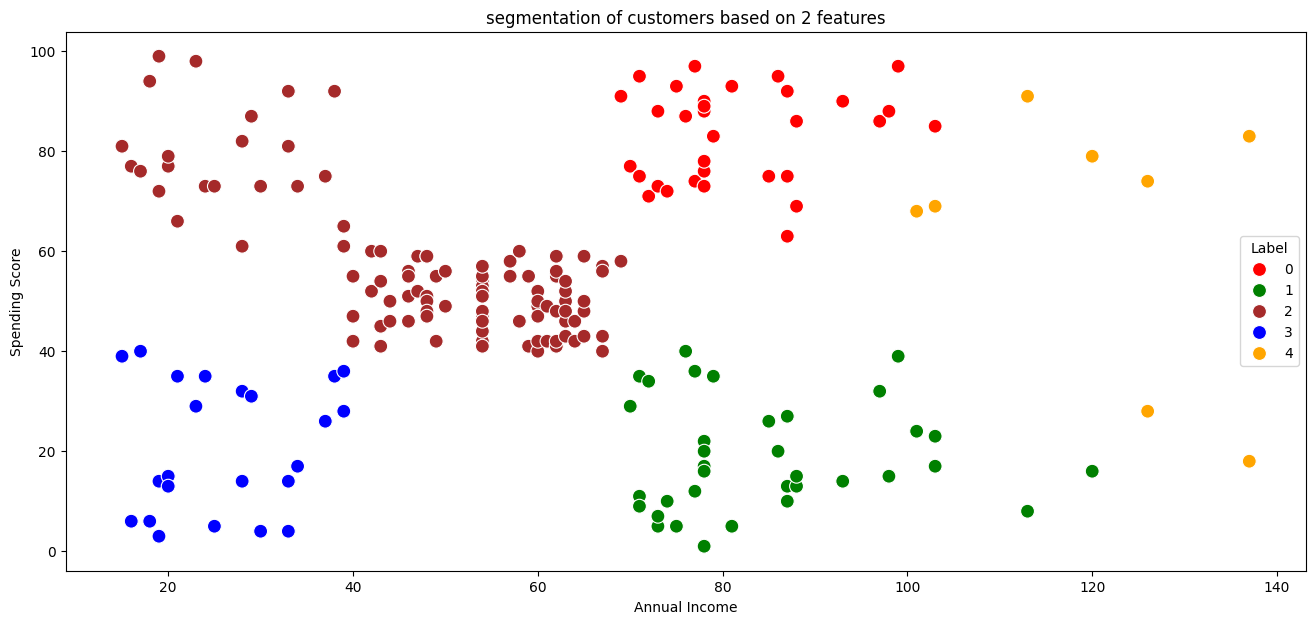

In [21]:
# Visualizing customer segments based on Annual Income and Spending Score
sns.scatterplot(x = 'Annual Income',y = 'Spending Score',data = df1,hue='Label',s =100,palette =['red','green','brown','blue','orange'])
plt.title('segmentation of customers based on 2 features')

# K-Means Clustering (3 Features)

In [22]:
# Selecting Age, Annual Income, and Spending Score for 3D clustering
df2 = df[['Age','Annual Income','Spending Score']]
df2.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


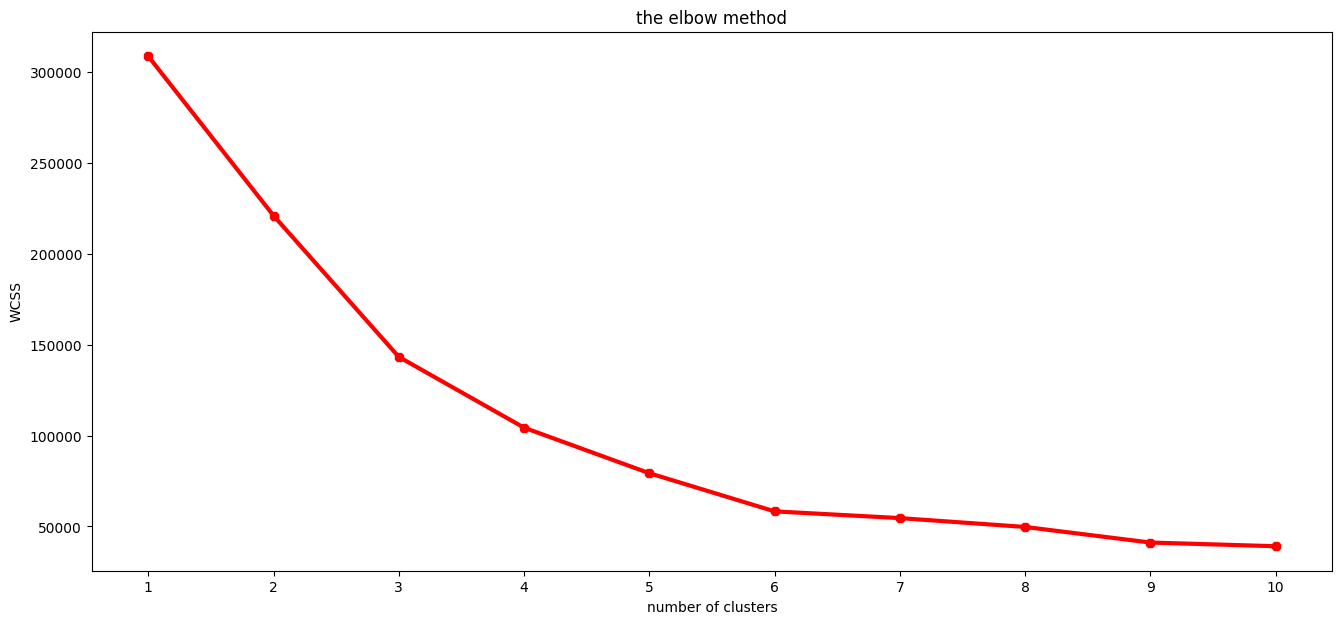

In [23]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    k = KMeans(n_clusters = i)
    k . fit(df2)
    wcss.append(k.inertia_)
plt.plot(range(1,11),wcss,linewidth = 3,color = 'red',marker = '8' )
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [24]:
# Apply K-Means clustering on 3 features
k = KMeans(n_clusters = 5)
k.fit(df2)
y = k.predict(df2)
df2['Label']=y
df2.head()

,Age,Annual Income,Spending Score,Label
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


# 3D Cluster Visualization

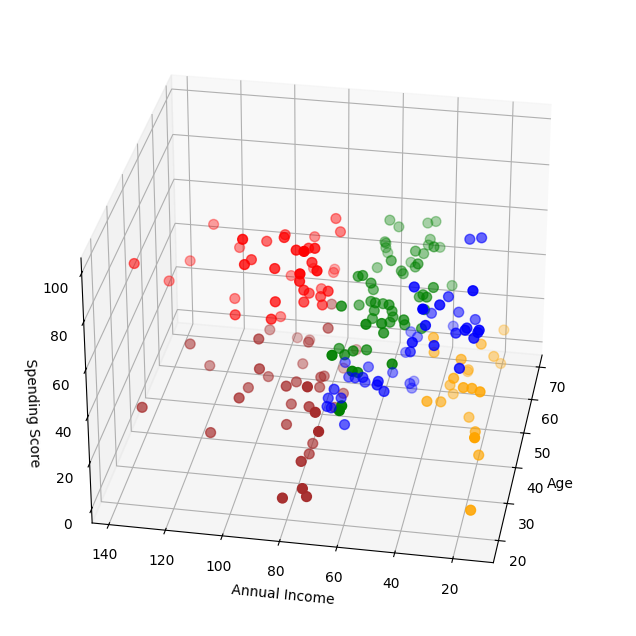

In [25]:
# 3D visualization of customer clusters
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111,projection ='3d')
ax.scatter(df2.Age[df2.Label ==0],df2['Annual Income'][df2.Label ==0],df2['Spending Score'][df2.Label ==0],c = 'red',s =50)
ax.scatter(df2.Age[df2.Label ==1],df2['Annual Income'][df2.Label ==1],df2['Spending Score'][df2.Label ==1],c = 'green',s =50)
ax.scatter(df2.Age[df2.Label ==2],df2['Annual Income'][df2.Label ==2],df2['Spending Score'][df2.Label ==2],c = 'blue',s =50)
ax.scatter(df2.Age[df2.Label ==3],df2['Annual Income'][df2.Label ==3],df2['Spending Score'][df2.Label ==3],c = 'brown',s =50)
ax.scatter(df2.Age[df2.Label ==4],df2['Annual Income'][df2.Label ==4],df2['Spending Score'][df2.Label ==4],c = 'orange',s =50)
ax.view_init(30,190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

# Cluster Profiling

In [26]:
# Mean values of each cluster to understand customer segments
df2.groupby('Label').mean()

,Age,Annual Income,Spending Score
Label,,,
0,32.692308,86.538462,82.128205
1,50.896552,55.500000,48.775862
2,24.454545,39.000000,65.659091
3,40.324324,87.432432,18.189189
4,44.318182,25.772727,20.272727


# PCA Visualization

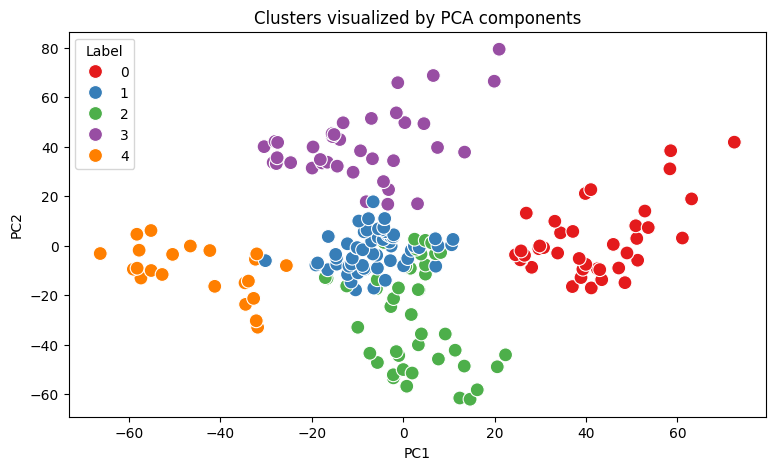

In [27]:
# Applying Principal Component Analysis (PCA) for 2D visualization of clusters
from sklearn.decomposition import PCA

# Reduce the dataset to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df2[['Age', 'Annual Income', 'Spending Score']])

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Label'] = df2['Label']  # Add cluster labels

# Visualize clusters with PCA components
plt.figure(figsize=(9,5))
sns.scatterplot(x='PC1', y='PC2', hue='Label', palette='Set1', data=df_pca, s=100)
plt.title('Clusters visualized by PCA components')
plt.show()


In [28]:
df2.groupby('Label').mean()


,Age,Annual Income,Spending Score
Label,,,
0,32.692308,86.538462,82.128205
1,50.896552,55.500000,48.775862
2,24.454545,39.000000,65.659091
3,40.324324,87.432432,18.189189
4,44.318182,25.772727,20.272727
